<a href="https://colab.research.google.com/github/AdonyeBrown/Churn_prediction-projection/blob/main/Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Problem Statement
ConnecTel Telecom Company is facing a pressing issue of customer churn, which poses a significant threat to its business sustainability and growth. The company's current retention strategy lacks precision and effectiveness, resulting in the loss of valuable customers to competitors

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df = pd.read_csv('/content/Customer-Churn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

total charge should be float type as it is the total amount of money charged

In [ ]:
# Notice that the total revenue is an object instead of a float

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]


['TotalCharges']

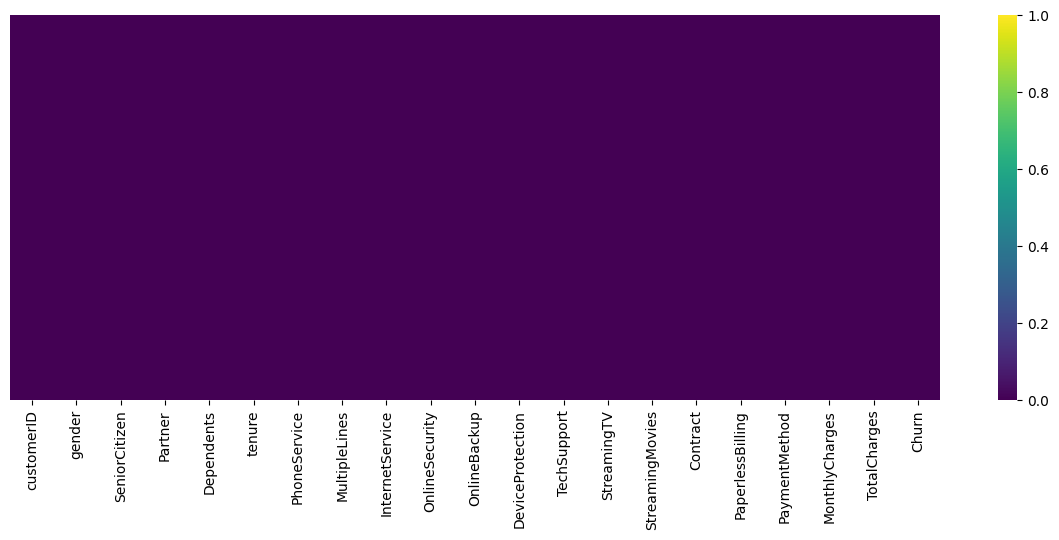

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), yticklabels= False, cmap="viridis");

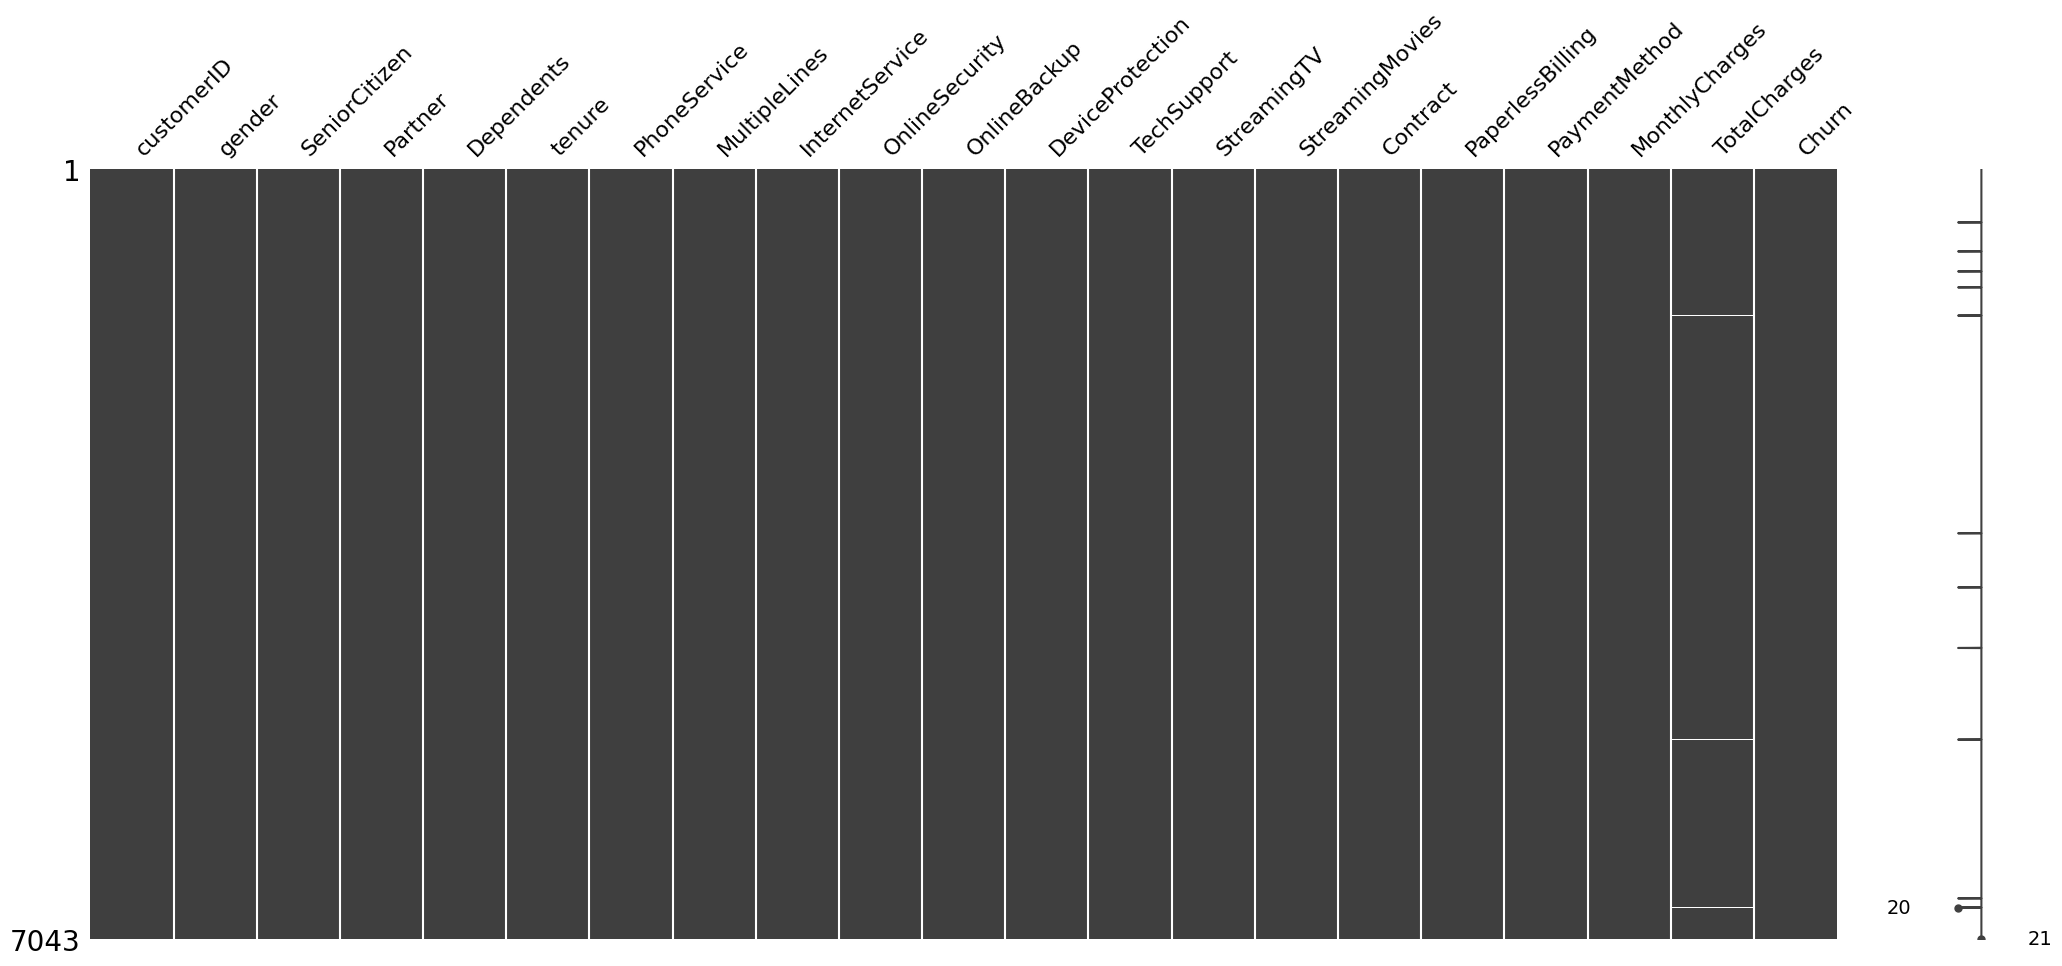

In [ ]:
msno.matrix(df, color=(0.25, 0.25, 0.25));

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace= True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.describe(include=['object','bool'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
df['Customerloyalty'] =(df['tenure']*df['MonthlyCharges'])-df['TotalCharges']
df['Customerloyalty'] = np.where(df['Customerloyalty'].values >= 0, 'Consistent','Not_consistent')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Consistent
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Consistent


### Univariate Data Analysis

In [ ]:
def add_percentage_label(ax,feature):
    total = len(feature) # Get the total count from the y-axis limit
    for patch in ax.patches:
        height=patch.get_height()
        percentage=(height/total)*100
        ax.text(patch.get_x()+ patch.get_width()/2,height +0.5,f"{percentage:.2f}%", ha ="center")

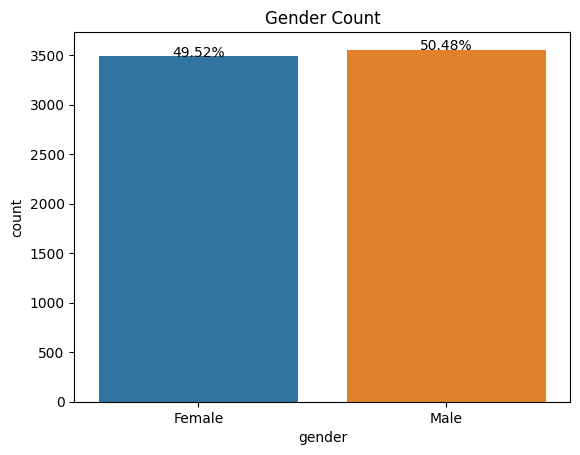

In [ ]:
ax=sns.countplot(x = "gender", data=df)
add_percentage_label(ax,df.gender)
plt.title("Gender Count");

Amount 50.55% of customers are males

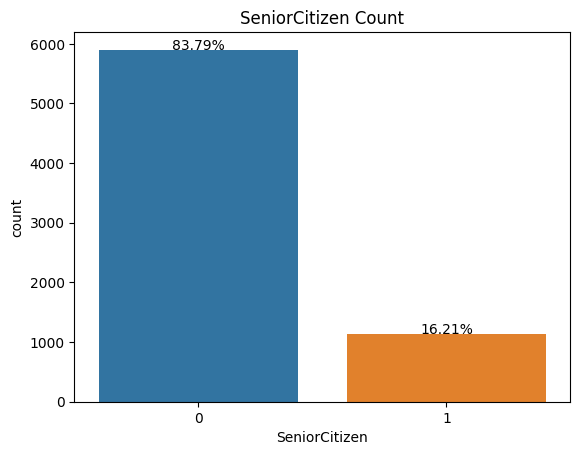

In [ ]:
sc=sns.countplot(x="SeniorCitizen", data=df)
add_percentage_label(sc,df.SeniorCitizen)
plt.title("SeniorCitizen Count");

Amount 83.79% of our customers are not senior citizens

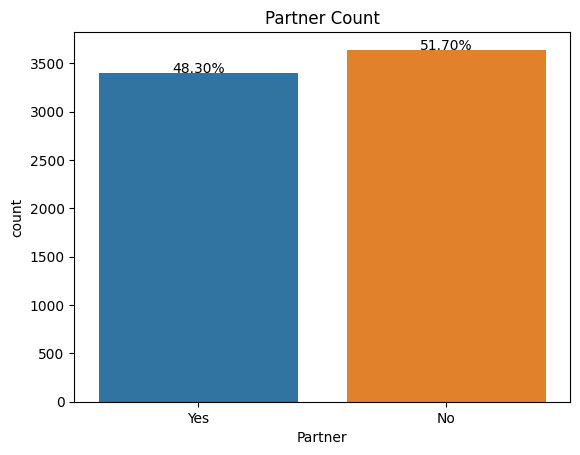

In [ ]:
pt=sns.countplot(x ="Partner", data=df)
add_percentage_label(pt,df.Partner)
plt.title("Partner Count");

48.37% of customers have partners

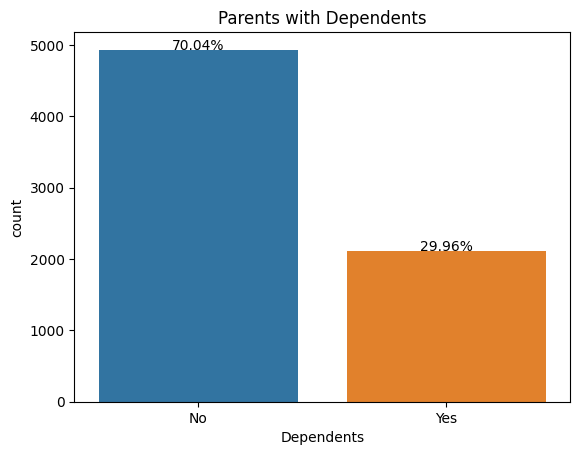

In [ ]:
D=sns.countplot(x = "Dependents", data=df)
add_percentage_label(D,df.Dependents)
plt.title("Parents with Dependents");

70.15% do not have dependents, the total customer base have more individuals without dependents than individuals with children.

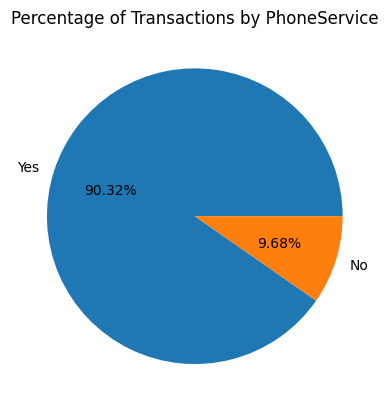

In [ ]:
plt.title('Percentage of Transactions by PhoneService')
ps_option = df['PhoneService'].value_counts().index
ps_val = df['PhoneService'].value_counts().values
plt.pie(ps_val, labels = ps_option, autopct = '%1.2f%%');

90.32% of the customers have phone service.

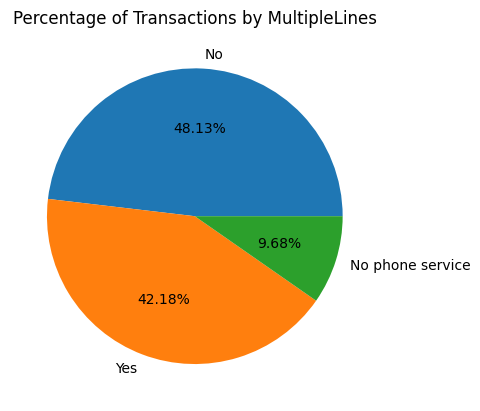

In [ ]:
plt.title('Percentage of Transactions by MultipleLines')
Ml_option = df['MultipleLines'].value_counts().index
Ml_val = df['MultipleLines'].value_counts().values
plt.pie(Ml_val, labels = Ml_option, autopct = '%1.2f%%');

We have about 48.13% of the total users having multiple lines.

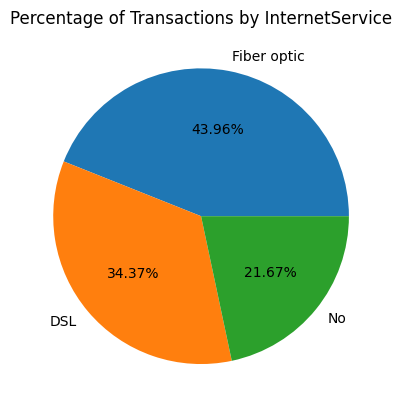

In [ ]:
plt.title('Percentage of Transactions by InternetService')
is_option = df['InternetService'].value_counts().index
is_val = df['InternetService'].value_counts().values
plt.pie(is_val, labels = is_option, autopct = '%1.2f%%');

43.96% use fiber optics and 34.36% use DSL. In total 77.39% of the customer base have internet service available for their use.

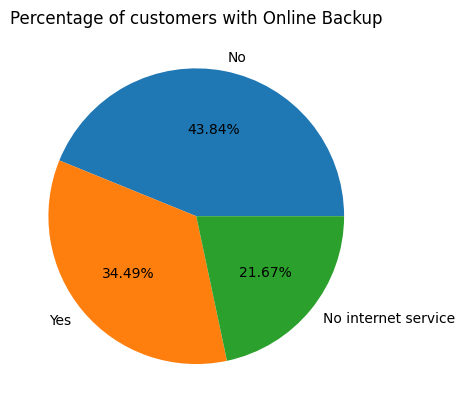

In [ ]:
plt.title('Percentage of customers with Online Backup')
ob_option = df['OnlineBackup'].value_counts().index
ob_val = df['OnlineBackup'].value_counts().values
plt.pie(ob_val, labels = ob_option, autopct = '%1.2f%%');

34.49% have online backup service.

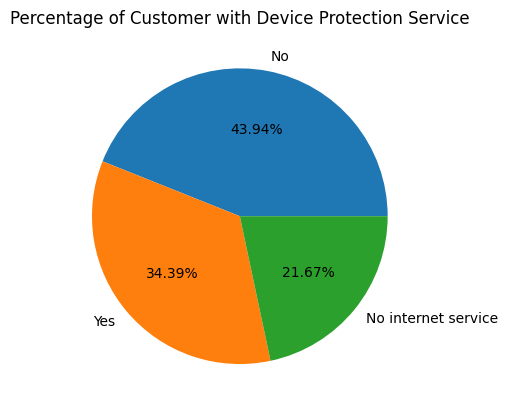

In [ ]:
plt.title('Percentage of Customer with Device Protection Service')
dp_option = df['DeviceProtection'].value_counts().index
dp_val = df['DeviceProtection'].value_counts().values
plt.pie(dp_val, labels = dp_option, autopct = '%1.2f%%');

34.39% have device protection service. Notice that only customers with online backup service have access to the device protection service

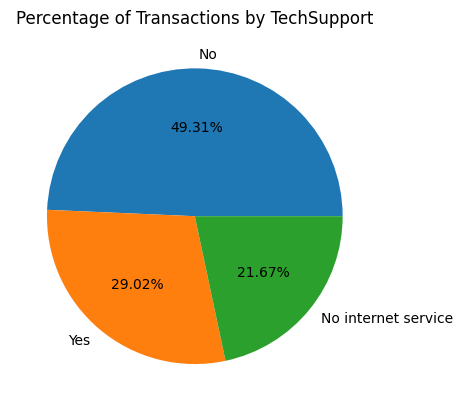

In [ ]:
plt.title('Percentage of Transactions by TechSupport')
ts_option = df['TechSupport'].value_counts().index
ts_val = df['TechSupport'].value_counts().values
plt.pie(ts_val, labels = ts_option, autopct = '%1.2f%%');

Only 29.02% of customers have techsupport.

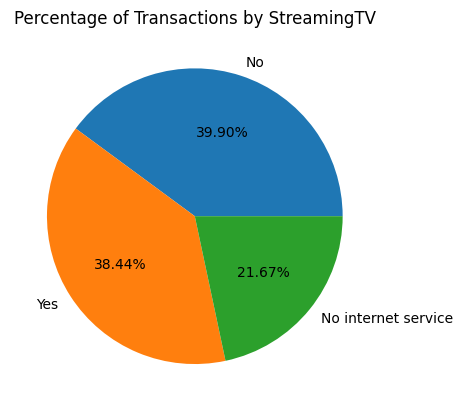

In [ ]:
plt.title('Percentage of Transactions by StreamingTV')
st_option = df['StreamingTV'].value_counts().index
st_val = df['StreamingTV'].value_counts().values
plt.pie(st_val, labels = st_option, autopct = '%1.2f%%');

38.44% use streaming TV

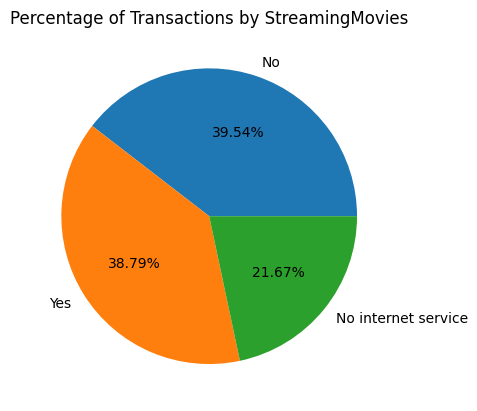

In [ ]:
plt.title('Percentage of Transactions by StreamingMovies')
sm_option = df['StreamingMovies'].value_counts().index
sm_val = df['StreamingMovies'].value_counts().values
plt.pie(sm_val, labels = sm_option, autopct = '%1.2f%%');

Notice that all customers using streaming TV are also using the streaming movie service.

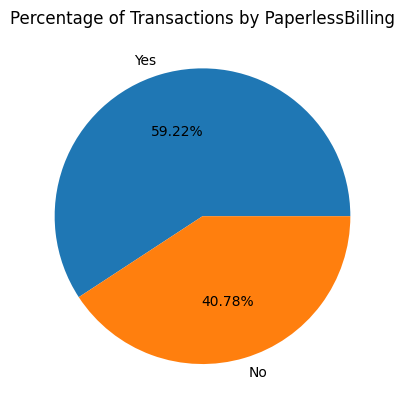

In [ ]:
plt.title('Percentage of Transactions by PaperlessBilling')
pb_option = df['PaperlessBilling'].value_counts().index
pb_val = df['PaperlessBilling'].value_counts().values
plt.pie(pb_val, labels = pb_option, autopct = '%1.2f%%');

59.22% the customers prefer paperless billing.

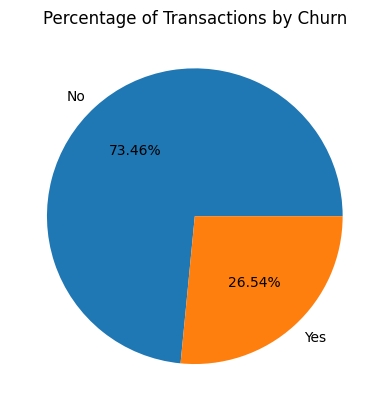

In [ ]:
plt.title('Percentage of Transactions by Churn')
ch_option = df['Churn'].value_counts().index
ch_val = df['Churn'].value_counts().values
plt.pie(ch_val, labels = ch_option, autopct = '%1.2f%%');

26.58% ot the total customers have cancelled service.

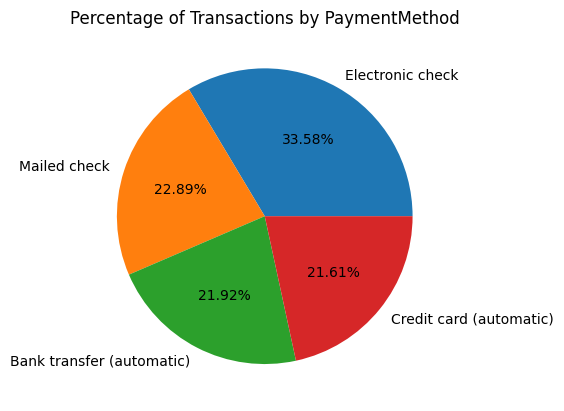

In [ ]:
plt.title('Percentage of Transactions by PaymentMethod')
pay_option = df["PaymentMethod"].value_counts().index
pay_val = df["PaymentMethod"].value_counts().values
plt.pie(pay_val, labels = pay_option, autopct = '%1.2f%%');

33.63% of the customers made transactions from Electronic check. It appears than the ratio is fairly balanced as the disparity amongst the strata is not much.

In [ ]:
print(f"Total categories in Contract : {df.Contract.value_counts()}\n")

Total categories in Contract : Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64



We have more customer subcribed to the month-to-month package

In [ ]:
def longevity(x):
    if x<=22:
        return 'New_Customers'
    elif x<=42:
        return 'Old_Customers'
    elif x<=62:
        return 'Lasting_Customers'
    else:
        return 'Grand_Customers'

df['Customer_longevity'] = df['tenure'].apply(longevity)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty,Customer_longevity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Consistent,New_Customers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Consistent,Old_Customers
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Not_consistent,New_Customers
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Consistent,Lasting_Customers
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Not_consistent,New_Customers


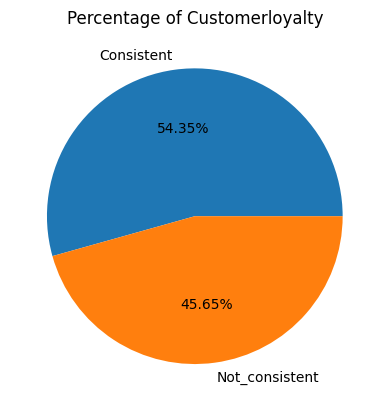

In [ ]:
plt.title('Percentage of Customerloyalty')
cl_option = df['Customerloyalty'].value_counts().index
cl_val = df['Customerloyalty'].value_counts().values
plt.pie(cl_val, labels = cl_option, autopct = '%1.2f%%');

54.35% of the customers are consistent subscribers

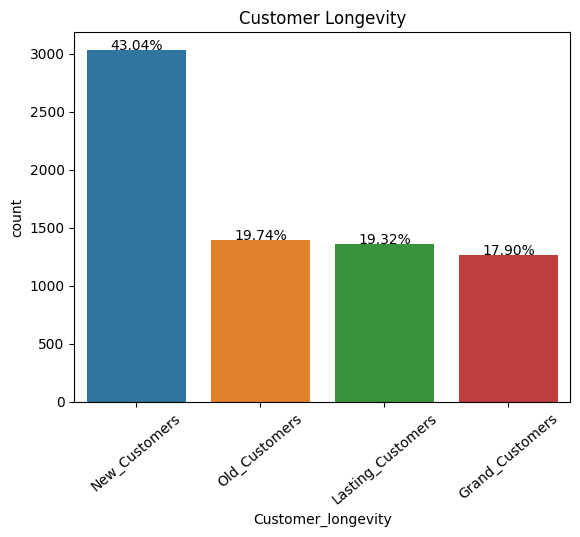

In [ ]:
cl=sns.countplot(x= 'Customer_longevity', data=df)
add_percentage_label(cl,df.Customer_longevity)
cl.set_xticklabels(cl.get_xticklabels(),rotation=40)
plt.title("Customer Longevity");

40.10% of the customers have been customers for about 20 months

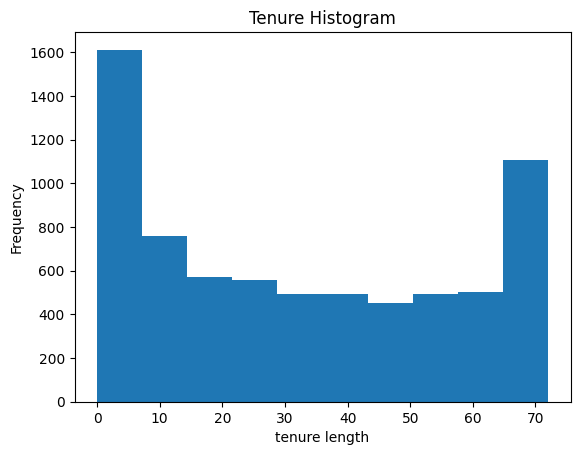

In [ ]:
aw=df['tenure']
plt.hist(aw, bins=10)
plt.ylabel('Frequency')
plt.xlabel('tenure length')
plt.title('Tenure Histogram');

we have new subscriber more within the range of 0-8 months

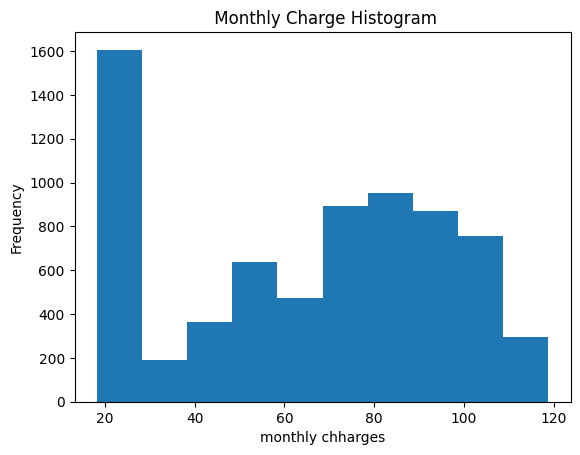

In [ ]:
aw=df['MonthlyCharges']
plt.hist(aw, bins=10)
plt.ylabel('Frequency')
plt.xlabel('monthly chharges')
plt.title(' Monthly Charge Histogram');

The distribution is almost evenly distributed

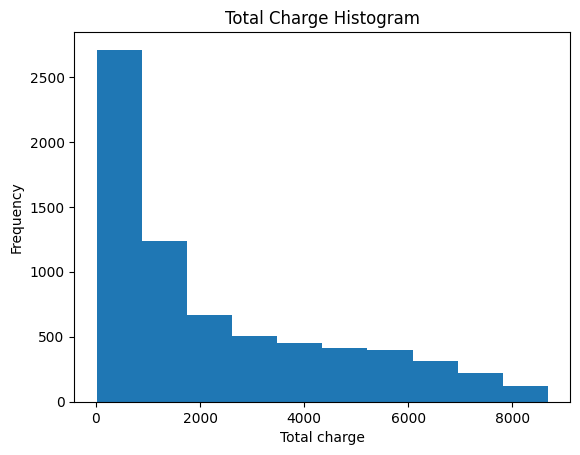

In [ ]:
ay=df['TotalCharges']
plt.hist(ay, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Total charge')
plt.title('Total Charge Histogram');

### Bivariate Data Analysis

Text(0.5, 1.0, 'Churn by Gender')

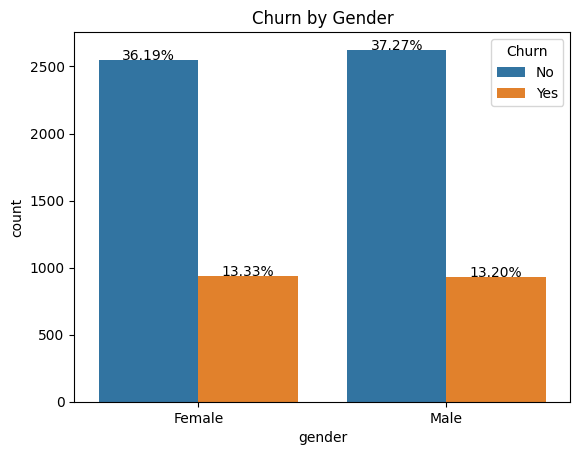

In [ ]:
ax=sns.countplot(data=df,x='gender',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by Gender")

Text(0.5, 1.0, 'Churn by SeniorCitizen')

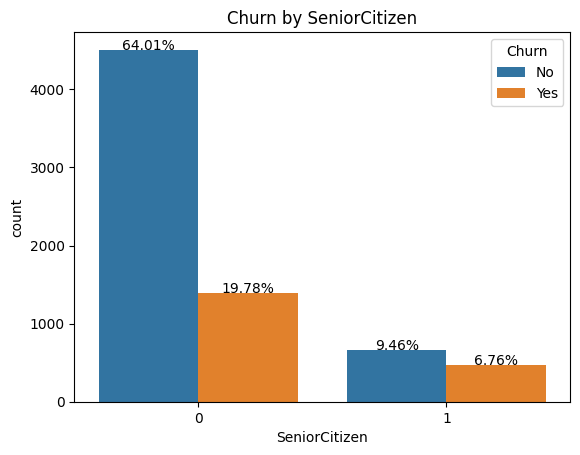

In [ ]:
ax=sns.countplot(data=df,x='SeniorCitizen',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by SeniorCitizen")

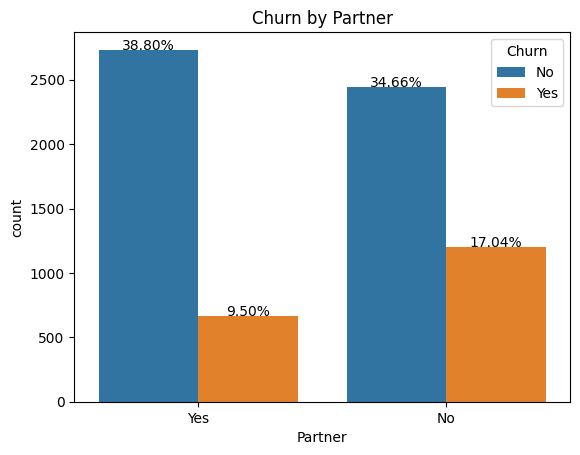

In [ ]:
ax=sns.countplot(data=df,x='Partner',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by Partner");

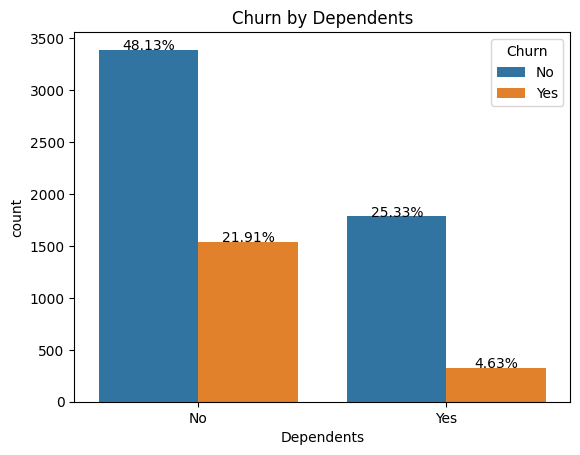

In [ ]:
ax=sns.countplot(data=df,x='Dependents',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by Dependents");

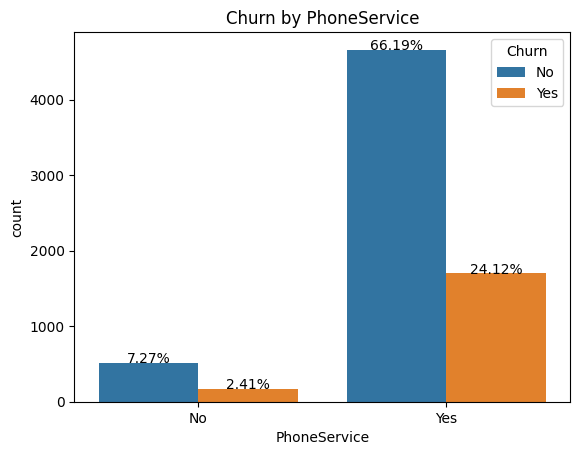

In [ ]:
ax=sns.countplot(data=df,x='PhoneService',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by PhoneService");

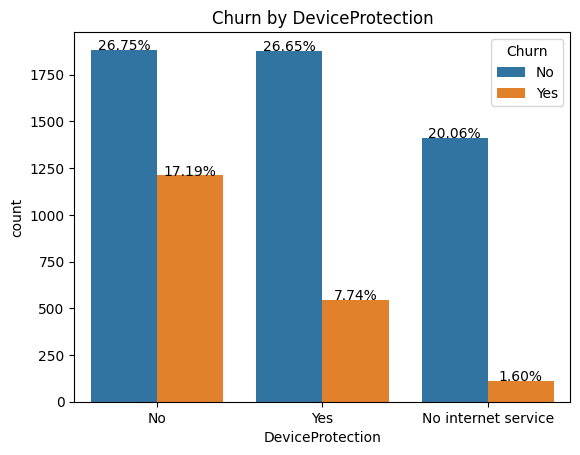

In [ ]:
ax=sns.countplot(data=df,x='DeviceProtection',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by DeviceProtection");

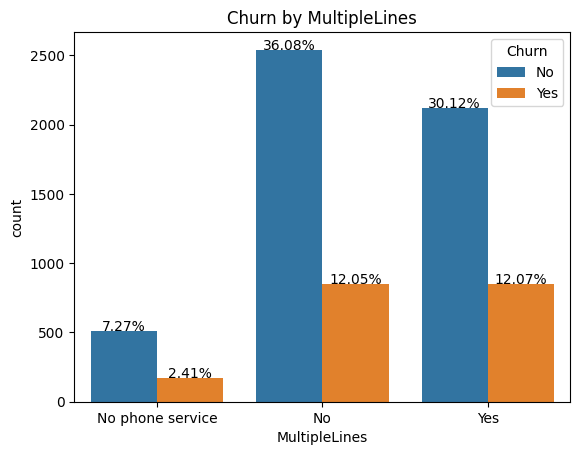

In [ ]:
ax=sns.countplot(data=df,x='MultipleLines',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by MultipleLines");

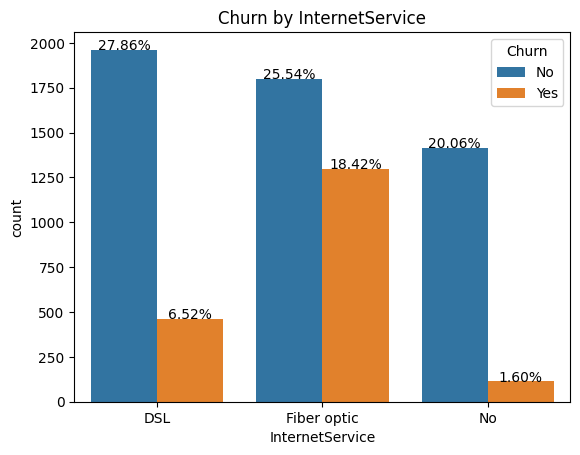

In [ ]:
ax=sns.countplot(data=df,x='InternetService',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by InternetService");

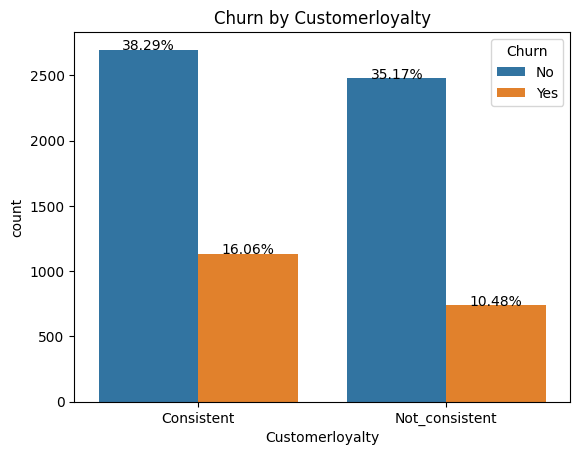

In [ ]:
ax=sns.countplot(data=df,x='Customerloyalty',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by Customerloyalty");

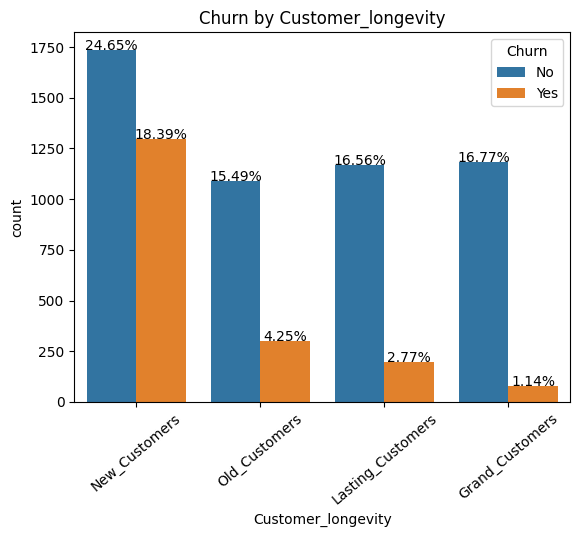

In [ ]:
ax=sns.countplot(data=df,x='Customer_longevity',hue="Churn")
add_percentage_label(ax,df.Churn)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Churn by Customer_longevity");

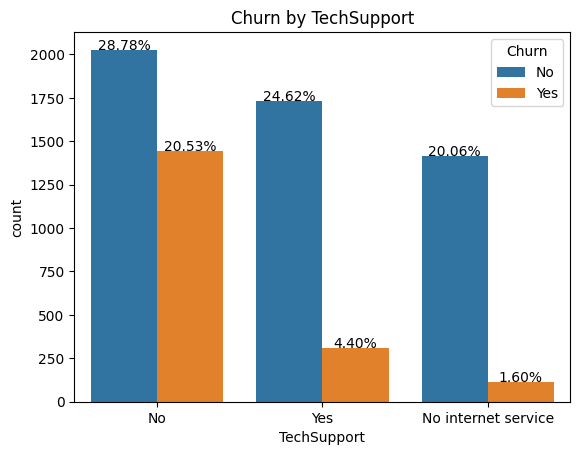

In [ ]:
ax=sns.countplot(data=df,x='TechSupport',hue="Churn")
add_percentage_label(ax,df.Churn)
plt.title("Churn by TechSupport");

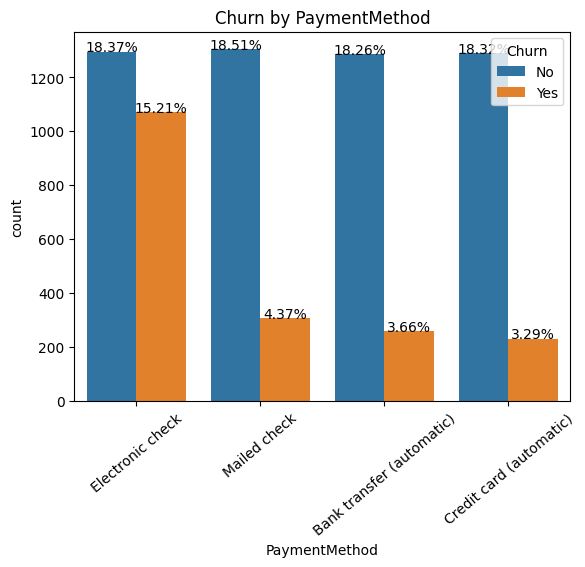

In [ ]:
ax=sns.countplot(data=df,x='PaymentMethod',hue="Churn")
add_percentage_label(ax,df.Churn)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.title("Churn by PaymentMethod");

### Oberservation of fields with very high churn rate:

- New customers with monthly subscription contracts.
- Customer using Fiber Optic internet service.
- Customers without Tech Support.
- Customers using the Electronic Check.
- Customers without Device Protection.

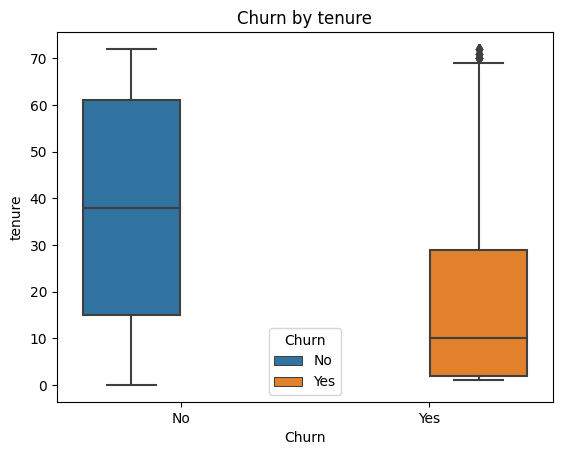

In [ ]:
sns.boxplot(x='Churn', y="tenure", data=df, hue="Churn")
plt.title('Churn by tenure');

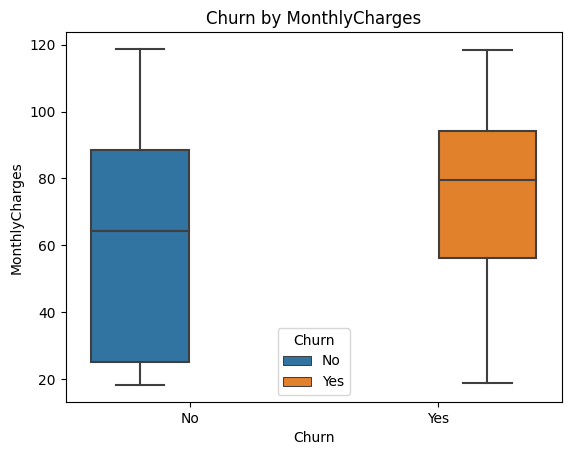

In [ ]:
sns.boxplot(x='Churn', y="MonthlyCharges", data=df, hue="Churn")
plt.title('Churn by MonthlyCharges');

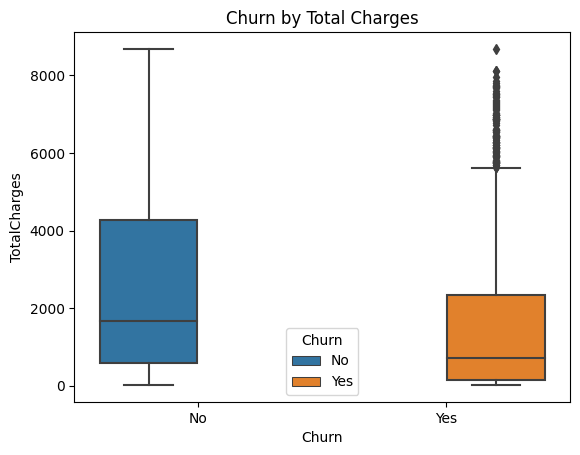

In [ ]:
sns.boxplot(x='Churn',y='TotalCharges', data=df, hue='Churn')
plt.title("Churn by Total Charges");

### Multivariate Data Analysis

Text(0.5, 1.0, 'Totalcharges & Monthlycharges by Churn')

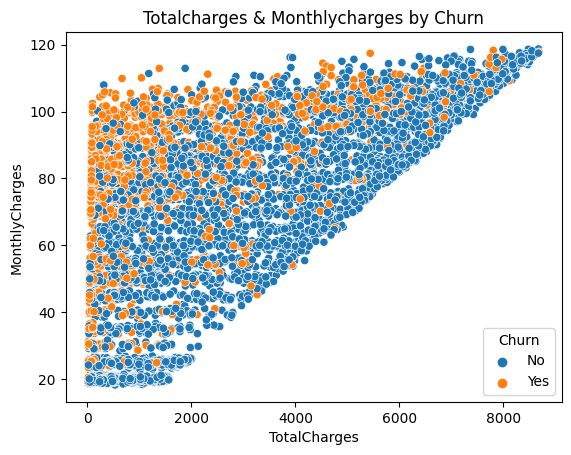

In [ ]:
sns.scatterplot(data=df, x='TotalCharges',y='MonthlyCharges',hue='Churn')
plt.title('Totalcharges & Monthlycharges by Churn')

<ipython-input-67-553c6e762aa1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


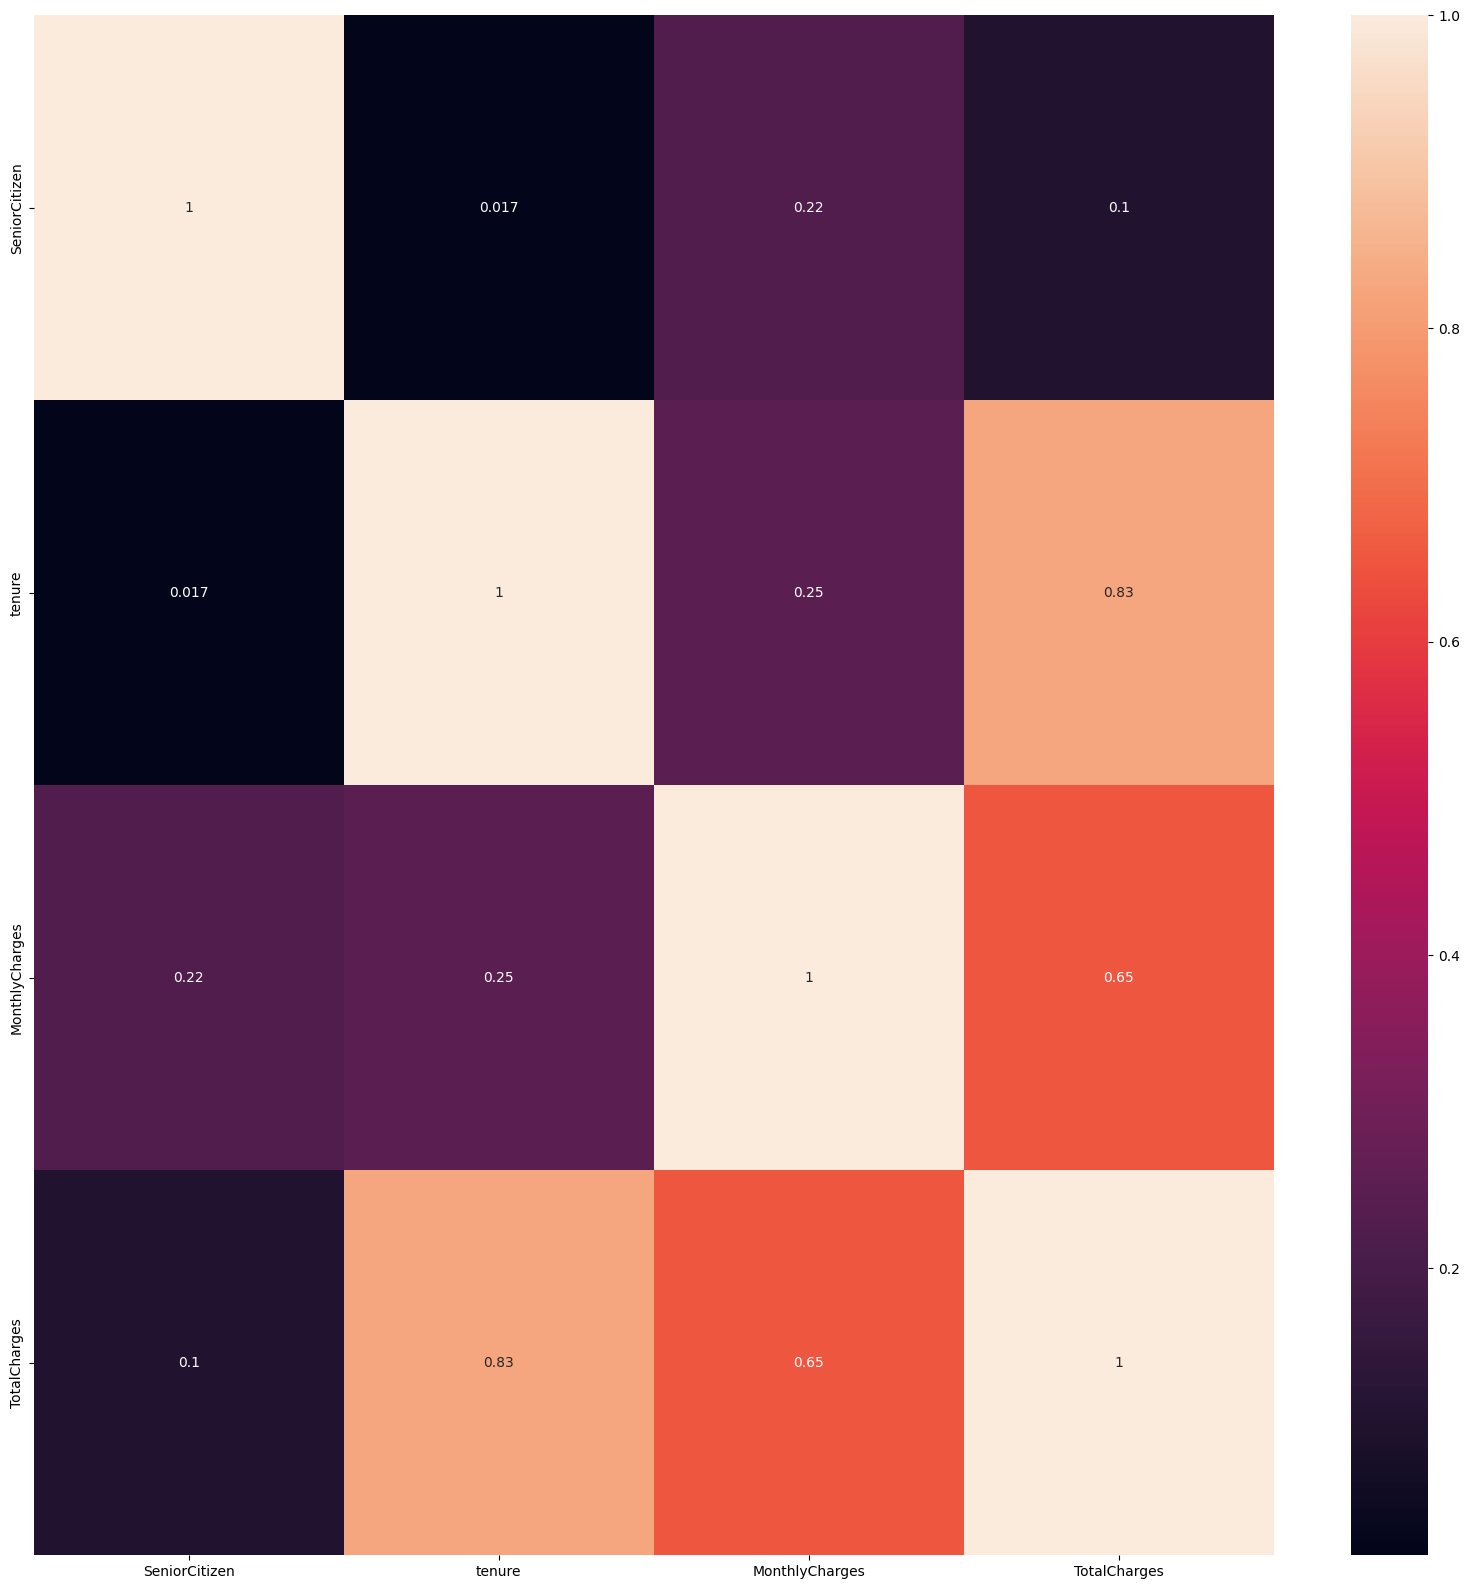

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

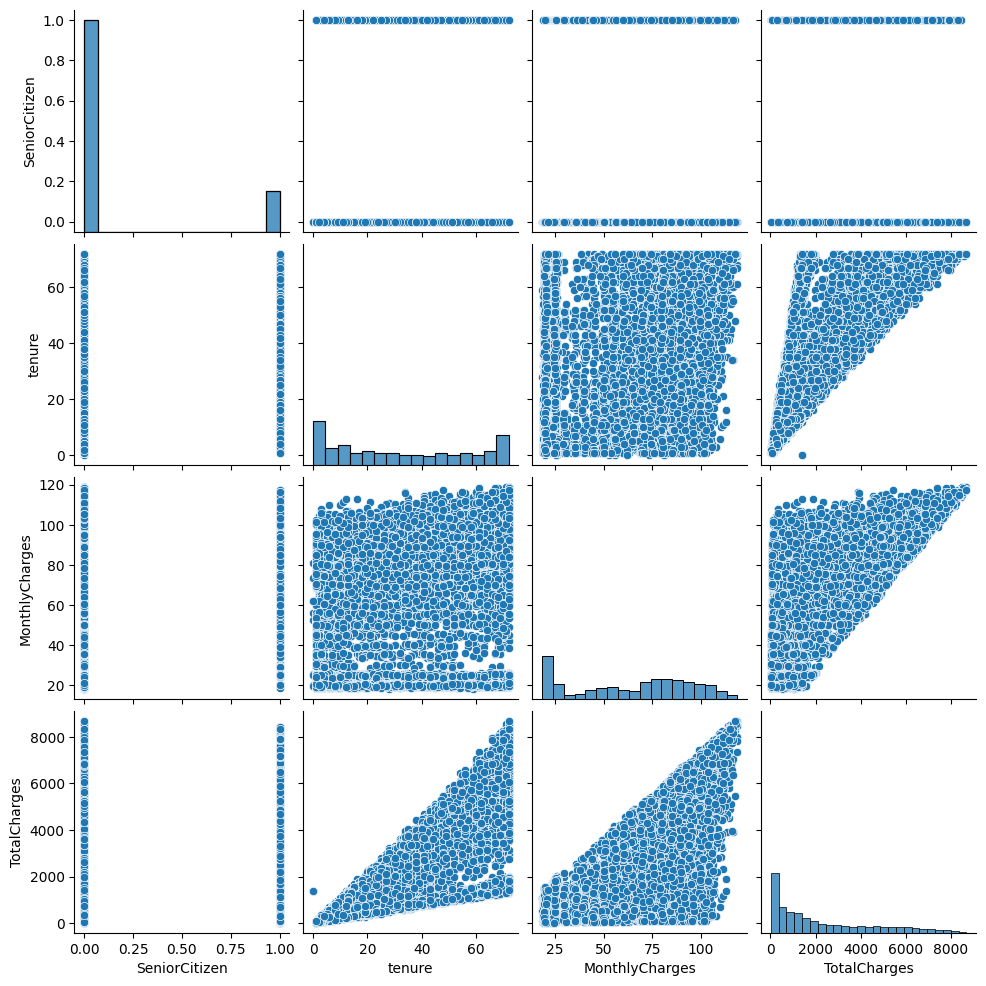

In [ ]:
sns.pairplot(df);

## Machine Learning

In [ ]:
def iloc_example(df,col):
    for i in df.index:
        val = df[col].iloc[i]
        if val == "No":
            df.at[i, col]= 0
        else:
            df.at[i, col]= 1

iloc_example(df, "Churn")

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customerloyalty,Customer_longevity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Consistent,New_Customers
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Consistent,Old_Customers


# Observations:
- New customers with monthly subscription contracts.
- Customer using Fiber Optic internet service.
- Customers without Tech Support.
- Customers using the Electronic Check.
- Customers without Device Protection.
# Actionable insight
- Track customer retention markers like how frequently a customer uses subscribed service.
- Track customer retention rate, churn rate and lifetime value.
- Measure customer loyalty using the CRR formula: ((E-N)/S)*100. E--number of - - customer at the end of a week/month/quarter/year/ N--number of new customer  during this period S-- number of customers at the start of the period-
I will recommend that management engage customer on a personal level by creating customer loyalty programs and benefits.

In [ ]:
df["label"] = (df.Churn).astype(int)

In [ ]:
df=df[['Partner', 'Dependents','tenure','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract','PaymentMethod', 'MonthlyCharges', 'TotalCharges','label']]

In [ ]:
# Encode Categorical features of the dataset:

class_data = pd.get_dummies(df, columns=["Partner","Dependents","OnlineSecurity",
                                         "OnlineBackup","DeviceProtection","TechSupport",
                                        "Contract","PaymentMethod"],
                            drop_first=True)

In [ ]:
# Segment Data
y = class_data['label'] # target
x = class_data.drop('label', axis = True)

In [ ]:
# Scale_prediction Data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_x = scaler.fit_transform(x)

## Split Train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scaled_x, y, test_size=0.3, random_state=0)

## Building a base classifier model
- Naive Bayes Classifier
- Random Forest Classifier
- KNeighbors Classifier
- Support Vector Machine
- Neural Network with tensorflow

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras import metrics

In [ ]:
# Instantiate the classifier
# Instantiate the model and fit to the scaled dataset

nby_model = GaussianNB()
nby_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
nby_pred = nby_model.predict(X_val)
nby_pred

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
# Accuracy
nby_score= nby_model.score(X_val, y_val)
print(f"model accuracy score is: {nby_score}")

model accuracy score is: 0.6975863700899195


In [ ]:
print("Naive Bayes Model Accuracy",accuracy_score(y_val, nby_pred))
print("Classification Report:\n", classification_report(y_val, nby_pred))

Naive Bayes Model Accuracy 0.6975863700899195
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76      1560
           1       0.46      0.81      0.58       553

    accuracy                           0.70      2113
   macro avg       0.68      0.74      0.67      2113
weighted avg       0.79      0.70      0.72      2113



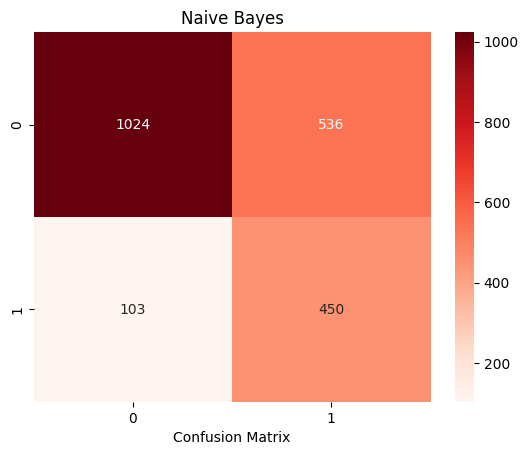

In [ ]:
# Create a confusion matrix
nbcm= confusion_matrix(y_val, nby_pred)

# Visualize the confusion matrix
sns.heatmap(nbcm, annot=True,cmap='Reds', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.title('Naive Bayes')
plt.show()

## Second Model

In [ ]:
knc_model = KNeighborsClassifier()
knc_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knc_pred = knc_model.predict(X_val)
knc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy
knc_score= knc_model.score(X_val, y_val)
print(f"model accuracy score is: {knc_score}")

model accuracy score is: 0.7699952673923331


In [ ]:
print("KNeighbors Model Accuracy",accuracy_score(y_val, knc_pred))
print("Classification Report:\n", classification_report(y_val, knc_pred))

KNeighbors Model Accuracy 0.7699952673923331
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1560
           1       0.57      0.48      0.52       553

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



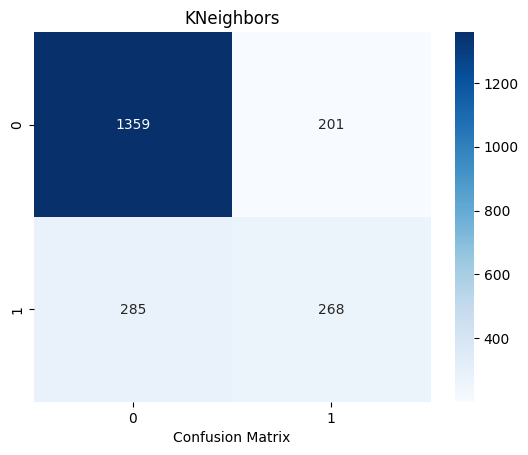

In [ ]:
# Create a confusion matrix
kncm= confusion_matrix(y_val, knc_pred)

# Visualize the confusion matrix
sns.heatmap(kncm, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.title('KNeighbors')
plt.show()

## Third Model

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc_model.predict(X_val)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy
rfc_score= rfc_model.score(X_val, y_val)
print(f"model accuracy score is: {rfc_score}")

model accuracy score is: 0.7870326549929011


In [ ]:
print("Random Forest Model Accuracy",accuracy_score(y_val, rfc_pred))
print("Classification Report:\n", classification_report(y_val, rfc_pred))

Random Forest Model Accuracy 0.7870326549929011
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1560
           1       0.62      0.49      0.55       553

    accuracy                           0.79      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



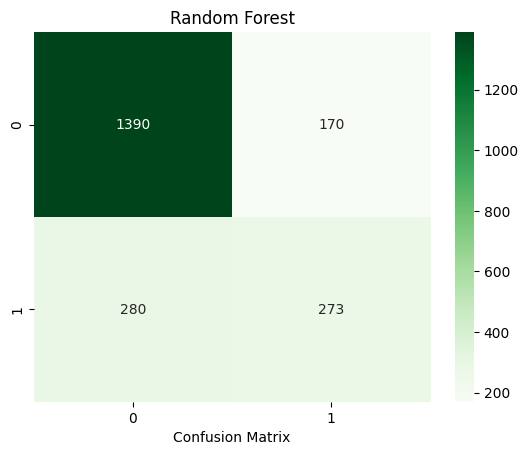

In [ ]:
# create a confusion matrix
rfcm= confusion_matrix(y_val, rfc_pred)

# visualize the confusion matrix
sns.heatmap(rfcm, annot=True,cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.title("Random Forest")
plt.show()

# Fourth Model

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_val)
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Support Vector Model Accuracy",accuracy_score(y_val, svc_pred))
print("Classification Report:\n", classification_report(y_val, svc_pred))

Support Vector Model Accuracy 0.7903454803596782
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1560
           1       0.63      0.47      0.54       553

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



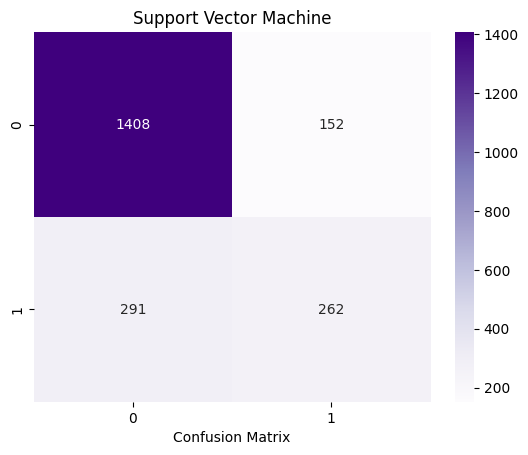

In [ ]:
svcm= confusion_matrix(y_val, svc_pred)


sns.heatmap(svcm, annot=True,cmap='Purples', fmt='g')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.xlabel('Confusion Matrix')
plt.title("Support Vector Machine")
plt.show()

Fifth Model

In [ ]:
X_train, X_temp, y_train, y_temp=train_test_split(scaled_x,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test=train_test_split(X_temp,y_temp, test_size=0.5, random_state=0)

In [ ]:
ks_model = tf.keras.Sequential([
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [ ]:
ks_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy',tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])

In [ ]:
ks_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
265/265 [==============================] - 3s 5ms/step - loss: 0.4941 - accuracy: 0.7420 - binary_accuracy: 0.7420 - false_negatives: 1036.0000 - val_loss: 0.4549 - val_accuracy: 0.7850 - val_binary_accuracy: 0.7850 - val_false_negatives: 237.0000
Epoch 2/10
265/265 [==============================] - 1s 3ms/step - loss: 0.4367 - accuracy: 0.7948 - binary_accuracy: 0.7948 - false_negatives: 599.0000 - val_loss: 0.4426 - val_accuracy: 0.7928 - val_binary_accuracy: 0.7928 - val_false_negatives: 168.0000
Epoch 3/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.7960 - binary_accuracy: 0.7960 - false_negatives: 494.0000 - val_loss: 0.4380 - val_accuracy: 0.8013 - val_binary_accuracy: 0.8013 - val_false_negatives: 180.0000
Epoch 4/10
265/265 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.7974 - binary_accuracy: 0.7974 - false_negatives: 501.0000 - val_loss: 0.4363 - val_accuracy: 0.7963 - val_binary_accuracy: 0.7963

In [ ]:
ks_model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 8ms/step - loss: 0.4387 - accuracy: 0.7885 - binary_accuracy: 0.7885 - false_negatives: 154.0000


[0.43872883915901184, 0.7885024547576904, 0.7885024547576904, 154.0]

What metrics are most important for the problem? Should the business be more concerned with better results on false negatives or true positives?
In the context of customer churn prediction, the business should be more concerned with better results on true positive rather than false negative.

True positives are the instances where the churn prediction model correctly identifies customers who are likely to churn, allowing the business to implement targeted retention initiatives to prevent customer churn. These are the customers who are at a high risk of leaving and are in need of immediate attention.

False negatives, on the other hand, occur when the churn prediction model incorrectly classifies customers as not likely to churn when they actually do end up churning. This can result in missed opportunities for implementing retention strategies and loss of customers to competitors.

Effectiveness in improving true positive results means that the business can accurately identify customers at high risk of churn, allowing them to intervene with appropriate retention measures. This can help in reducing actual churn and retaining valuable customers.

However, it is also important to strike a balance and minimize false negative results as well. A high false negative rate would result in missed opportunities to retain customers who were misclassified as not at risk of churn. Therefore, it's crucial to find a balance between minimizing false negatives and maximizing true positives.